In [2]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.models import Sequential, Model
from tensorflow.image import resize
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# Import Dataset
folder_path_train = "Dataset/datasets"

In [4]:
file_list = pd.DataFrame(os.listdir(folder_path_train), columns=['Files_Name'])
print(file_list)

     Files_Name
0         paper
1     .DS_Store
2   green-glass
3       clothes
4         metal
5     cardboard
6         trash
7    biological
8   white-glass
9       battery
10  brown-glass
11      plastic
12        shoes


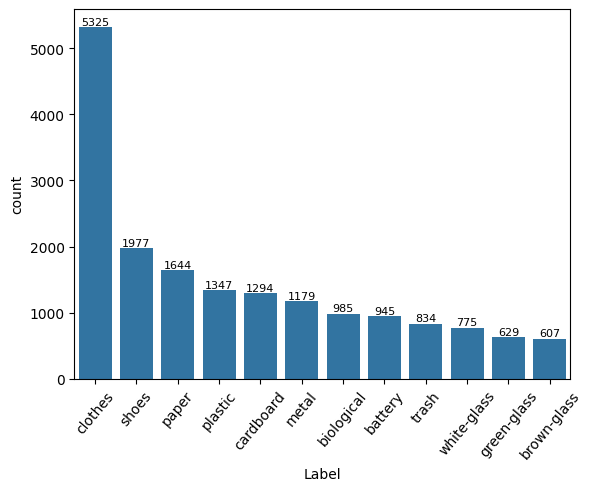

In [5]:
files = [i for i in glob.glob(folder_path_train + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pd.DataFrame(data, columns = ["Image", "Label"])
label_counts = dataframe["Label"].value_counts()
label_counts_sorted = label_counts.sort_values(ascending=False)
sns.countplot(x=dataframe["Label"], order=label_counts_sorted.index)
for i, count in enumerate(label_counts_sorted):
    plt.text(i, count, str(count), ha="center", va="bottom", fontsize=8)

plt.xticks(rotation=50)
plt.show()

In [6]:
# Train Dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  folder_path_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(180, 180),
  batch_size=32,)

Found 17541 files belonging to 12 classes.
Using 14033 files for training.


In [7]:
# Val Dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  folder_path_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(180, 180),
  batch_size=32,)

Found 17541 files belonging to 12 classes.
Using 3508 files for validation.


In [8]:
# ClassName
class_names = train_ds.class_names
print(class_names)

['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']


Image Load


2024-06-02 19:53:23.374739: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


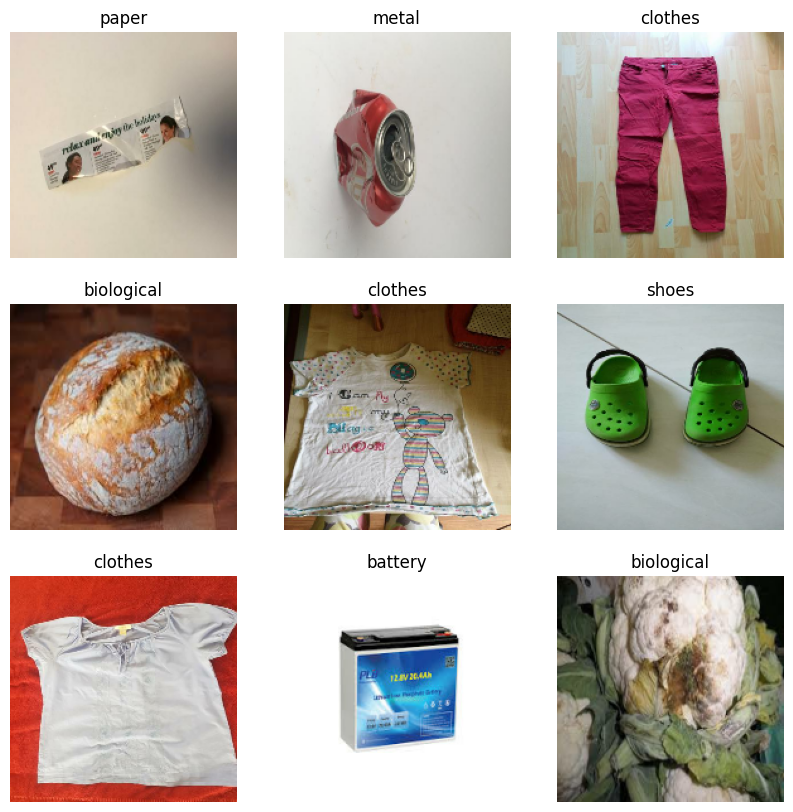

In [9]:
# Dataset Preview
print("Image Load")
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
model = tf.keras.Sequential([
    Rescaling(1./255, input_shape=(180, 180, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

/Users/snafcat/Documents/Coding/bangkit/.venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,524 (25.36 MB)

 Trainable params: 6,648,524 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Melatih model
history = model.fit(train_ds, validation_data=val_ds, epochs=50, callbacks=[early_stopping])

Epoch 1/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 330s 750ms/step - accuracy: 0.3759 - loss: 1.8953 - val_accuracy: 0.6517 - val_loss: 1.1149
Epoch 2/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 324s 737ms/step - accuracy: 0.5937 - loss: 1.2671 - val_accuracy: 0.7124 - val_loss: 0.9153
Epoch 3/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 298s 678ms/step - accuracy: 0.6670 - loss: 1.0546 - val_accuracy: 0.7315 - val_loss: 0.8259
Epoch 4/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 296s 675ms/step - accuracy: 0.7052 - loss: 0.9008 - val_accuracy: 0.7206 - val_loss: 0.9024
Epoch 5/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 785ms/step - accuracy: 0.7463 - loss: 0.7571

KeyboardInterrupt: 

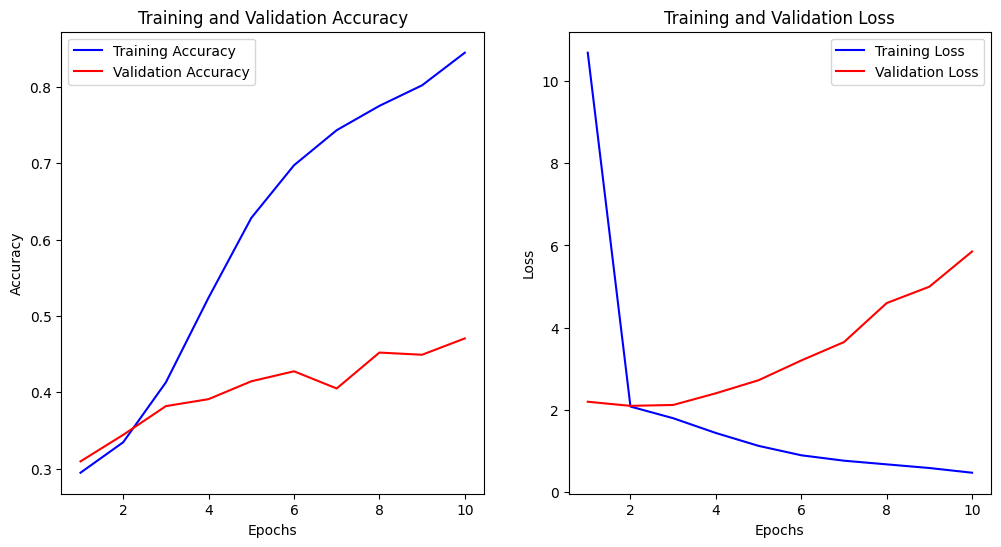

In [59]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()